# Gradient Descent for Simple Linear Regression

In this notebook, we'll implement simple linear regression using both Gradient Descent (GD) and Stochastic Gradient Descent (SGD) on a small dataset of study hours and exam scores.

## Dataset
Here's the dataset we'll be using:

| Hours of Study (x) | Exam Score (y) |
|--------------------|----------------|
| 1                  | 2              |
| 2                  | 4              |
| 3                  | 6              |
| 4                  | 8              |
| 5                  | 10             |

## Steps:
1. Load the dataset.
2. Implement Gradient Descent Algorithm (GD).
3. Implement Stochastic Gradient Descent Algorithm (SGD).
4. Evaluate the models: After training, use the optimized parameters to make predictions on the training data. Plot the regression lines obtained from both GD and SGD against the training data.
5. Plot the cost function value over iterations for GD and over epochs for SGD. Compare the regression lines and cost function convergence.

In [1]:
import pandas as pd

In [2]:
arr1 = [1,2,3,4,5]
arr2 = [2,4,6,8,10]

In [3]:
df_dict  = {"Hours of Study": arr1, "Exam Score": arr2}

In [5]:
df = pd.DataFrame(df_dict)
df.head()

,Hours of Study,Exam Score
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [6]:
X = df['Hours of Study']
y = df['Exam Score']

In [7]:
beta_0 = 1
beta_1 = 1

def y_predict(x, beta_0, beta_1):
    return beta_0 + beta_1 * x

In [8]:
def cost_function(X, y, beta_0, beta_1):
    m = len(X)
    J = 0
    for i in range(m):
        y_pred = y_predict(X[i], beta_0, beta_1)
        J += (y[i] - y_pred) ** 2
    J = J / (2 * m)
    return J

In [9]:
def gradient1(X, y, beta_0, beta_1):
    grad = 0
    m = len(X)
    for i in range(m):
        grad += (y[i] - y_predict(X[i], beta_0, beta_1))
    grad = grad / m
    return grad


In [10]:
def gradient2(X, y, beta_0, beta_1):
    grad = 0
    m = len(X)
    for i in range(m):
        grad += (y[i] - y_predict(X[i], beta_0, beta_1)) * X[i]
    grad = grad / m
    return grad

In [11]:

err_arr = []
def gradient_descent(X, y, beta_0, beta_1, alpha=0.01, iterations=20):
    for i in range(iterations):
        cost = cost_function(X, y, beta_0, beta_1)
        err_arr.append(cost)
        if cost < 0.1:
            break
        grad1 = gradient1(X, y, beta_0, beta_1)
        grad2 = gradient2(X, y, beta_0, beta_1)
        beta_0 += alpha * grad1
        beta_1 += alpha * grad2
    return beta_0, beta_1, cost
    
beta_0, beta_1, final_cost = gradient_descent(X, y, beta_0, beta_1)
print("MSE:", final_cost)
print(f"Parameters: beta 0 = {beta_0}, beta 1 = {beta_1}")
y_pred_arr = []
for i in range(len(X)):
    y_pred = beta_0 + beta_1 * X[i]
    y_pred_arr.append(y_pred)

MSE: 0.14403930913736782
Parameters: beta 0 = 1.1315430637888977, beta 1 = 1.6283072334972502


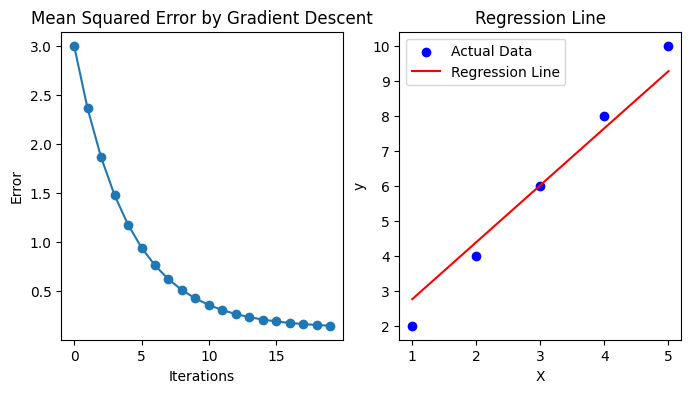

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.plot(err_arr, marker='o')
plt.title("Mean Squared Error by Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Error")

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Actual Data') 
plt.plot(X, y_pred_arr, color='red', label='Regression Line') 
plt.title("Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

In [13]:
err_arr=[]
def stochastic_gradient_descent(X, y, epochs=20, alpha=0.01, precision=0.0001):
    beta_0 = 1
    beta_1 = 1
    m = len(X)
    previous_CF = float('inf')
    
    for epoch in range(epochs):
        CF = 0
        
        for i in range(m):
            y_pred = beta_0 + beta_1 * X[i]
            MSE = ((y_pred - y[i]) ** 2) / 2
            CF += MSE
            grad_b0 = y_pred - y[i]
            grad_b1 = (y_pred - y[i]) * X[i]
            
            beta_0 -= alpha * grad_b0
            beta_1 -= alpha * grad_b1
        
        if abs(previous_CF - CF) < precision:
            break
        
        previous_CF = CF
        err_arr.append(previous_CF)

    return beta_0, beta_1

beta_0, beta_1 = stochastic_gradient_descent(X, y)

In [14]:
y_pred_arr = []
for i in range(len(X)):
    y_pred = beta_0 + beta_1 * X[i]
    y_pred_arr.append(y_pred)
    
print("MSE: ", err_arr[len(err_arr)-1])
print("beta 0: ", beta_0)
print("beta 1: ", beta_1)

MSE:  0.49458191858294737
beta 0:  1.0081415608968631
beta 1:  1.7413881179704789


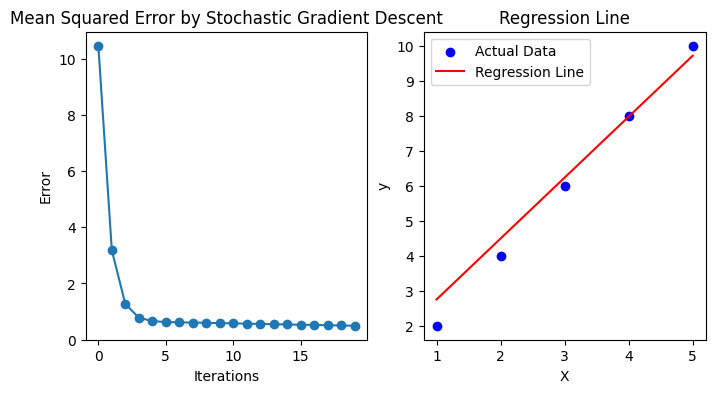

In [15]:
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.plot(err_arr, marker='o')
plt.title("Mean Squared Error by Stochastic Gradient Descent")
plt.xlabel("Iterations")
plt.ylabel("Error")

plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue', label='Actual Data') 
plt.plot(X, y_pred_arr, color='red', label='Regression Line') 
plt.title("Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()